2021 Feb 26

## 数据清洗及分析教程
张家宁 Sally (avecsally@163.com)

链接：https://pan.baidu.com/s/1WFmiAFpZsLgZjEsZ3htFKQ 
提取码：ldud

### Twitter 评论1 数据分析案例Sample

数据处理的第一步通常是对数据进行清洗.
数据清洗是数据分析的必备环节，在进行分析过程中，会发现不符合分析要求的数据，例如重复、错误、缺失、异常类数据，这时就需要我们对有问题的数据进行处理方便后期分析。

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
from matplotlib import cm
from matplotlib import axes
import matplotlib.dates as mdate
import pylab as mpl  #导入中文字体，避免显示乱码
import seaborn as sns #visualisation

sns.set(color_codes=True)
import pylab
pylab.mpl.rcParams['font.sans-serif'] = ['SimHei']#防止中文乱码
pylab.mpl.rcParams['axes.unicode_minus'] = False#防止中文乱码
mpl.rcParams['font.sans-serif']=['SimHei']

Python数据清洗完整版教程： https://blog.csdn.net/liumengqi11/article/details/113174269?ops_request_misc=&request_id=&biz_id=102&utm_term=数据清洗步骤%20Python&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-1-113174269.first_rank_v2_pc_rank_v29&spm=1018.2226.3001.4187

In [2]:
twitter = pd.read_excel('数据结果汇总/twitter评论1.xlsx')

In [3]:
twitter

,推文原始url,评论url,评论时间,评论内容,评论转发量,评论评论量,评论点赞量,评论类型,评论附加信息,评论用户ID,...,评论用户主页链接,评论用户推文数,评论用户正在关注数,评论用户关注数,评论用户喜欢数,评论用户列表数,评论用户地域,评论用户简介,评论用户加入时间,评论用户生日
0,https://twitter.com/AP_Politics/status/1195271...,https://twitter.com/kumulaga_robin/status/1195...,2019-11-15 20:47:48,回复 @AP_Politics @AP Sometime its tough being a...,0,0,0,文本,"文本, 回复 @AP_Politics @AP",kumulaga_robin,...,https://twitter.com/kumulaga_robin,355,160,7,219,0,NaN,NaN,41913.0,NaN
1,https://twitter.com/AP_Politics/status/1195271...,https://twitter.com/edokk/status/1195309211397...,2019-11-15 19:54:58,回复 @AP_Politics @AP I bet he didn't consult wi...,0,0,0,文本,"文本, 回复 @AP_Politics @AP",edokk,...,https://twitter.com/edokk,1512,380,31,413,0,NaN,NaN,40483.0,NaN
2,https://twitter.com/AP_Politics/status/1195271...,https://twitter.com/RedPillGraphix/status/1195...,2019-11-15 19:46:26,回复 @AP_Politics @AP Obama is so fond of Patric...,0,0,0,文本,"文本, 回复 @AP_Politics @AP",RedPillGraphix,...,https://twitter.com/RedPillGraphix,2756,204,84,1261,0,NaN,"Patriot, Part-Time artist. Full-time #MAGA Bre...",41395.0,NaN
3,https://twitter.com/AP_Politics/status/1195271...,https://twitter.com/sunsetlistening/status/119...,2019-11-15 19:29:54,回复 @AP_Politics @AP Everyone longs for the Oba...,0,1,2,文本,"文本, 回复 @AP_Politics @AP",sunsetlistening,...,https://twitter.com/sunsetlistening,5010,139,243,10419,0,NaN,Living in the Sunset space of deep listening,42948.0,NaN
4,https://twitter.com/AP_Politics/status/1195271...,https://twitter.com/wleelindsay/status/1195300...,2019-11-15 19:20:25,回复 @AP_Politics @AP Quite irrelevant. Dems hav...,0,1,1,文本,"文本, 回复 @AP_Politics @AP",wleelindsay,...,https://twitter.com/wleelindsay,4440,30,39,5542,0,"West Virginia, USA","Singer/song writer, part time activist, full t...",42186.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747447,https://twitter.com/chowtingagnes/status/11398...,https://twitter.com/shin_shr190506/status/1139...,2019-06-15 16:52:23,回复 @chowtingagnes 日本人はあなたたちを心から応援しています！！ 負けないで...,0,0,1,文本,"文本, 回复 @chowtingagnes",shin_shr190506,...,https://twitter.com/shin_shr190506,21421,2597,8206,48735,0,NaN,【あいちトリエンナーレで炎上したChim↑Pom『気合100連発』は製作者の「放射能誘導」で...,43586.0,NaN
747448,https://twitter.com/chowtingagnes/status/11398...,https://twitter.com/abra_meat/status/113981778...,2019-06-15 16:51:51,回复 @chowtingagnes 明日どこでデモしますか？？,0,0,1,文本,"文本, 回复 @chowtingagnes",abra_meat,...,https://twitter.com/abra_meat,102,181,96,736,0,油島住み希望,趣味垢 #油風呂 #デカキンさん,43282.0,NaN
747449,https://twitter.com/chowtingagnes/status/11398...,https://twitter.com/YesDefenseStudy/status/113...,2019-06-15 16:47:39,回复 @chowtingagnes 大変お疲れ様でした。 これでめでたしではないはずです。 ...,2,0,3,文本,"文本, 回复 @chowtingagnes",YesDefenseStudy,...,https://twitter.com/YesDefenseStudy,32842,809,658,5756,0,東京,#香港加油 人権、平和、自由、民主主義 そんなものに保守とかリベラルとか対立するのは本来おか...,42736.0,NaN
747450,https://twitter.com/chowtingagnes/status/11398...,https://twitter.com/8AabXU5loiTMv8r/status/113...,2019-06-15 16:47:19,回复 @chowtingagnes 頑張ってくださいね！,0,0,2,文本,"文本, 回复 @chowtingagnes",8AabXU5loiTMv8r,...,https://twitter.com/8AabXU5loiTMv8r,10,195,66,136,0,NaN,慶応義塾大学を卒業し、公務員になったのに退職し、命がけの海外ボランティアを15年間やり、無一...,43586.0,NaN


可以看到整个数据有747452行21列,列的名称如下

In [4]:
twitter.columns

Index(['推文原始url', '评论url', '评论时间', '评论内容', '评论转发量', '评论评论量', '评论点赞量', '评论类型',
       '评论附加信息', '评论用户ID', '评论用户名', '评论用户主页链接', '评论用户推文数', '评论用户正在关注数',
       '评论用户关注数', '评论用户喜欢数', '评论用户列表数', '评论用户地域', '评论用户简介', '评论用户加入时间',
       '评论用户生日'],
      dtype='object')

In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747452 entries, 0 to 747451
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   推文原始url    747452 non-null  object        
 1   评论url      747452 non-null  object        
 2   评论时间       747452 non-null  datetime64[ns]
 3   评论内容       747452 non-null  object        
 4   评论转发量      747452 non-null  int64         
 5   评论评论量      747452 non-null  int64         
 6   评论点赞量      747452 non-null  int64         
 7   评论类型       747452 non-null  object        
 8   评论附加信息     747452 non-null  object        
 9   评论用户ID     747452 non-null  object        
 10  评论用户名      745588 non-null  object        
 11  评论用户主页链接   747452 non-null  object        
 12  评论用户推文数    747452 non-null  int64         
 13  评论用户正在关注数  747452 non-null  int64         
 14  评论用户关注数    747452 non-null  int64         
 15  评论用户喜欢数    747452 non-null  int64         
 16  评论用户列表数    747452 no

In [6]:
twitter.duplicated().sum()
#可以看到数据集没有重复的数据

0

In [7]:
twitter['推文原始url'].value_counts()

https://twitter.com/agearan/status/1190437844873076737           258
https://twitter.com/AP/status/1195913217865920512                256
https://twitter.com/CBSNews/status/1190826005398802432           255
https://twitter.com/CBSNews/status/1168566635676016640           250
https://twitter.com/CBSNews/status/1188500497185103872           242
                                                                ... 
https://twitter.com/CNNEE/status/1162439648595124225               1
https://twitter.com/APWestRegion/status/1161878962815012866        1
https://twitter.com/APMiddleEast/status/1181652881637810179        1
https://twitter.com/CBSEveningNews/status/1196896125820833792      1
https://twitter.com/charlesmok/status/1196265922622676992          1
Name: 推文原始url, Length: 19113, dtype: int64

In [8]:
df=twitter.copy()

In [9]:
df.describe()
#对所有numerical value进行汇总

,评论转发量,评论评论量,评论点赞量,评论用户推文数,评论用户正在关注数,评论用户关注数,评论用户喜欢数,评论用户列表数,评论用户加入时间
count,747452.000000,747452.000000,747452.000000,7.474520e+05,7.474520e+05,7.474520e+05,7.474520e+05,747452.000000,746873.000000
mean,0.482661,0.364350,4.875782,1.905010e+04,9.515903e+02,1.472306e+03,2.089712e+04,2.849626,41816.561340
std,14.061228,5.568075,110.785096,4.568866e+04,3.928270e+03,4.412180e+04,4.755471e+04,708.911344,1317.665083
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,38899.000000
25%,0.000000,0.000000,0.000000,1.747000e+03,1.200000e+02,3.800000e+01,1.086000e+03,0.000000,40634.000000
50%,0.000000,0.000000,0.000000,5.751000e+03,3.260000e+02,1.330000e+02,5.193000e+03,0.000000,41852.000000
75%,0.000000,0.000000,2.000000,1.724500e+04,8.420000e+02,4.630000e+02,1.968700e+04,0.000000,43040.000000
max,5539.000000,1652.000000,53137.000000,2.053313e+06,1.226440e+06,2.988430e+07,1.197395e+06,250000.000000,43800.000000


In [10]:
df.iloc[10]

推文原始url      https://twitter.com/AnnCoulter/status/11569559...
评论url        https://twitter.com/dennisdiclaudio/status/115...
评论时间                                       2019-08-02 06:01:57
评论内容         回复 @AnnCoulter @SantasTavern Ann Coulter even ...
评论转发量                                                        1
评论评论量                                                        5
评论点赞量                                                       11
评论类型                                                        文本
评论附加信息                        文本, 回复 @AnnCoulter @SantasTavern
评论用户ID                                         dennisdiclaudio
评论用户名                                         Dennis DiClaudio
评论用户主页链接                   https://twitter.com/dennisdiclaudio
评论用户推文数                                                  78801
评论用户正在关注数                                                 4454
评论用户关注数                                                  11087
评论用户喜欢数                                                

通过简单地目测数据结构，我们应该对整个数据有一个大致的认识。有效的数据分析的第一步是认清进行分析的目标是什么。

    这个数据描述的是什么样的事情？
    我们可以做怎样的分析？
    
    
    整体来说，数据集包含了一条推文的评论，以及留下这条评论的人的相关信息。
    评论的信息可以大致分为两类：
    1. 评论的内容、时间、转发量、评论量、点赞量、类型
    2. 评论人的信息如用户名、主页链接、用户推文数、关注数、喜欢数等等基本信息
    

想要对以上信息进行分析，首先可以研究同一推文下数据分布情况，比如同一推文下的评论数量，评论转发量随时间的分布，评论该推文的用户的情况等等。

首先我们需要将数据根据原始推文分组之后进行讨论。

#### Groupby原始推文

In [11]:
name={'推文原始url': '推文地址',
'评论url':'评论地址', 
'评论时间':'评论时间',
'评论内容':'评论内容',
'评论转发量': '评论转发量',
'评论评论量' :'评论评论量',
'评论点赞量' : '评论点赞量',
'评论类型'  :'评论类型',
'评论附加信息' :'评论附加信息',
'评论用户ID' : '评论用户ID',
'评论用户名' :'评论用户名',
'评论用户主页链接' :'评论用户主页链接',
'评论用户推文数' : '评论用户推文数',
'评论用户正在关注数' :'评论用户正在关注数',
'评论用户关注数'  :'评论用户关注数',
'评论用户喜欢数' : '评论用户喜欢数',
'评论用户列表数' : '评论用户列表数',
'评论用户地域'  : '评论用户地域',
'评论用户简介' : '评论用户简介',
'评论用户加入时间':'评论用户加入时间',
'评论用户生日': '评论用户生日' }
df=df.rename(columns=name)

In [12]:
#Groupby Function
grouped_twitter = df.groupby('推文地址').agg({'评论内容':[np.size]}).rename(columns={'size': '该推文被评论总次数（评论数）'})
grouped_twitter

,评论内容
,该推文被评论总次数（评论数）
推文地址,
https://twitter.com/11thHour/status/1186836849412706304,11
https://twitter.com/11thHour/status/1186857818940411904,9
https://twitter.com/48hours/status/1175182880697389057,9
https://twitter.com/48hours/status/1175801933342228481,5
https://twitter.com/48hours/status/1196133288093667329,10
...,...
https://twitter.com/weijia/status/1195347666689036288,9
https://twitter.com/weijia/status/1197164972276629505,10


In [13]:
#pivot table function
pd.pivot_table(df,index=['推文地址'],aggfunc=[np.sum])#可以mean,min,max,etc..

sum                   \
                                                   评论点赞量  评论用户关注数 评论用户列表数   
推文地址                                                                        
https://twitter.com/11thHour/status/11868368494...     7     8328      11   
https://twitter.com/11thHour/status/11868578189...     9      896       1   
https://twitter.com/48hours/status/117518288069...    57    21841       9   
https://twitter.com/48hours/status/117580193334...    20      642       1   
https://twitter.com/48hours/status/119613328809...    15     5914       6   
...                                                  ...      ...     ...   
https://twitter.com/weijia/status/1195347666689...     2     4295       2   
https://twitter.com/weijia/status/1197164972276...  3676   181214      27   
https://twitter.com/weijia/status/1202235200870...     1     1035       3   
https://twitter.com/yadvashem/status/1141267813...  5141   123717       2   
https://twitter.com/yashar/status/1151213150223...   829  2471815      72   

                                                                              \
                                                    评论用户加入时间 评论用户喜欢数 评论用户推文数   
推文地址                                                                           
https://twitter.com/11thHour/status/11868368494...  453950.0  273435  296634   
https://twitter.com/11thHour/status/11868578189...  379285.0   81545   40654   
https://twitter.com/48hours/status/117518288069...  373227.0  514567  274497   
https://twitter.com/48hours/status/117580193334...  203143.0   20062   33175   
https://twitter.com/48hours/status/119613328809...  412283.0  248225  225106   
...                                                      ...     ...     ...   
https://twitter.com/weijia/status/1195347666689...  377522.0  264991  192228   
https://twitter.com/weijia/status/1197164972276...  415143.0  645545  481993   
https://twitter.com/weijia/status/1202235200870...  203599.0    9568   91332   
https://twitter.com/yadvashem/status/1141267813...  378711.0  150442  122466   
https://twitter.com/yashar/status/1151213150223...  401178.0  829195  974165   

                                                                          
                                                   评论用户正在关注数 评论评论量 评论转发量  
推文地址                                                                      
https://twitter.com/11thHour/status/11868368494...     12525     3     1  
https://twitter.com/11thHour/status/11868578189...      3626     2     0  
https://twitter.com/48hours/status/117518288069...      9551     3     0  
https://twitter.com/48hours/status/117580193334...      1684     2     0  
https://twitter.com/48hours/status/119613328809...     10734     0     1  
...                                                      ...   ...   ...  
https://twitter.com/weijia/status/1195347666689...      8001     0     0  
https://twitter.com/weijia/status/1197164972276...     13171   264   305  
https://twitter.com/weijia/status/1202235200870...      1814     1     0  
https://twitter.com/yadvashem/status/1141267813...      8386   604   340  
https://twitter.com/yashar/status/1151213150223...     87761    27    14  

[19113 rows x 9 columns]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


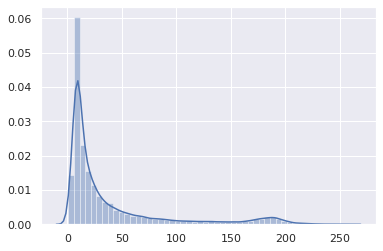

In [14]:
sns.distplot(grouped_twitter)

In [15]:
df2 = df.groupby('推文地址').agg({'评论转发量':[np.mean,np.min,np.max]}).rename(columns={'mean': '平均次数', 'amin': '最低值', 'amax': '最高值'})
df2

评论转发量         
                                                         平均次数 最低值  最高值
推文地址                                                                  
https://twitter.com/11thHour/status/11868368494...   0.090909   0    1
https://twitter.com/11thHour/status/11868578189...   0.000000   0    0
https://twitter.com/48hours/status/117518288069...   0.000000   0    0
https://twitter.com/48hours/status/117580193334...   0.000000   0    0
https://twitter.com/48hours/status/119613328809...   0.100000   0    1
...                                                       ...  ..  ...
https://twitter.com/weijia/status/1195347666689...   0.000000   0    0
https://twitter.com/weijia/status/1197164972276...  30.500000   1  150
https://twitter.com/weijia/status/1202235200870...   0.000000   0    0
https://twitter.com/yadvashem/status/1141267813...  37.777778   0  105
https://twitter.com/yashar/status/1151213150223...   1.400000   0    6

[19113 rows x 3 columns]

In [16]:
df2.describe()

评论转发量                            
               平均次数           最低值           最高值
count  19113.000000  19113.000000  19113.000000
mean       0.539907      0.024591      6.320410
std        6.874434      0.550051     71.888749
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.038462      0.000000      1.000000
75%        0.135714      0.000000      2.000000
max      612.700000     46.000000   5539.000000

In [17]:
#条件式进行查询
df.loc[df['评论转发量']>=5000,:]

,推文地址,评论地址,评论时间,评论内容,评论转发量,评论评论量,评论点赞量,评论类型,评论附加信息,评论用户ID,...,评论用户主页链接,评论用户推文数,评论用户正在关注数,评论用户关注数,评论用户喜欢数,评论用户列表数,评论用户地域,评论用户简介,评论用户加入时间,评论用户生日
426130,https://twitter.com/realDonaldTrump/status/115...,https://twitter.com/w_terrence/status/11545116...,2019-07-26 05:59:56,回复 @realDonaldTrump Thank You President Trump ...,5539,1108,18970,视频,"视频, 回复 @realDonaldTrump",w_terrence,...,https://twitter.com/w_terrence,4028,610,710358,6021,0,United States,Actor• Comedian•Commentator• https://www.terre...,39965.0,43717


In [18]:
# 多条件查询
df.loc[(df['评论类型']=='视频')& (df['评论转发量']>=1000),:]

,推文地址,评论地址,评论时间,评论内容,评论转发量,评论评论量,评论点赞量,评论类型,评论附加信息,评论用户ID,...,评论用户主页链接,评论用户推文数,评论用户正在关注数,评论用户关注数,评论用户喜欢数,评论用户列表数,评论用户地域,评论用户简介,评论用户加入时间,评论用户生日
13051,https://twitter.com/realDonaldTrump/status/115...,https://twitter.com/DeepStateExpose/status/115...,2019-07-20 04:59:08,回复 @realDonaldTrump @kanyewest RT! Christianit...,1320,190,1446,视频,"视频, 回复 @realDonaldTrump @kanyewest",DeepStateExpose,...,https://twitter.com/DeepStateExpose,53235,311898,289352,32036,1,North of the Wall,Jeremy Stone | Bestselling Author | Conservati...,42248.0,NaN
426130,https://twitter.com/realDonaldTrump/status/115...,https://twitter.com/w_terrence/status/11545116...,2019-07-26 05:59:56,回复 @realDonaldTrump Thank You President Trump ...,5539,1108,18970,视频,"视频, 回复 @realDonaldTrump",w_terrence,...,https://twitter.com/w_terrence,4028,610,710358,6021,0,United States,Actor• Comedian•Commentator• https://www.terre...,39965.0,43717


In [19]:
df3=df.drop(['推文地址','评论地址','评论时间','评论内容','评论类型','评论附加信息','评论用户ID','评论用户名','评论用户主页链接','评论用户地域','评论用户简介','评论用户加入时间','评论用户生日'],axis=1)

In [20]:
df3

,评论转发量,评论评论量,评论点赞量,评论用户推文数,评论用户正在关注数,评论用户关注数,评论用户喜欢数,评论用户列表数
0,0,0,0,355,160,7,219,0
1,0,0,0,1512,380,31,413,0
2,0,0,0,2756,204,84,1261,0
3,0,1,2,5010,139,243,10419,0
4,0,1,1,4440,30,39,5542,0
...,...,...,...,...,...,...,...,...
747447,0,0,1,21421,2597,8206,48735,0
747448,0,0,1,102,181,96,736,0
747449,2,0,3,32842,809,658,5756,0
747450,0,0,2,10,195,66,136,0


In [21]:
df_corr=df3.corr()
df_corr

,评论转发量,评论评论量,评论点赞量,评论用户推文数,评论用户正在关注数,评论用户关注数,评论用户喜欢数,评论用户列表数
评论转发量,1.000000,0.586542,0.784540,0.017753,0.060305,0.341450,0.018921,0.004705
评论评论量,0.586542,1.000000,0.547413,0.019773,0.056433,0.183965,0.019744,0.000945
评论点赞量,0.784540,0.547413,1.000000,0.014631,0.036183,0.493100,0.021111,0.002405
评论用户推文数,0.017753,0.019773,0.014631,1.000000,0.250001,0.047820,0.554682,0.005391
评论用户正在关注数,0.060305,0.056433,0.036183,0.250001,1.000000,0.114532,0.195880,0.074409
评论用户关注数,0.341450,0.183965,0.493100,0.047820,0.114532,1.000000,0.027201,0.006192
评论用户喜欢数,0.018921,0.019744,0.021111,0.554682,0.195880,0.027201,1.000000,0.003692
评论用户列表数,0.004705,0.000945,0.002405,0.005391,0.074409,0.006192,0.003692,1.000000


/Applications/Utilities/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35780 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35770 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/Utilities/anacon

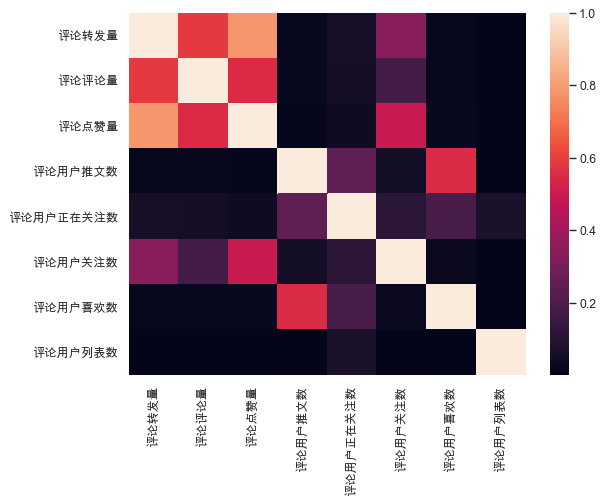

In [22]:
plt.figure(figsize=(8, 6),dpi=80)
sns.heatmap(data=df_corr)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']#解决中文乱码问题

In [23]:
#观察一条推文的评论随着时间的变化
df4=df.loc[(df['推文地址']=='https://twitter.com/yadvashem/status/1141267813249835008')]

In [24]:
df4

,推文地址,评论地址,评论时间,评论内容,评论转发量,评论评论量,评论点赞量,评论类型,评论附加信息,评论用户ID,...,评论用户主页链接,评论用户推文数,评论用户正在关注数,评论用户关注数,评论用户喜欢数,评论用户列表数,评论用户地域,评论用户简介,评论用户加入时间,评论用户生日
131426,https://twitter.com/yadvashem/status/114126781...,https://twitter.com/Armedandproud/status/11417...,2019-06-21 01:05:56,回复 @RachelOsiris @yadvashem pic.twitter.com/xv...,2,0,13,图片,"图片, 回复 @RachelOsiris @yadvashem",Armedandproud,...,https://twitter.com/Armedandproud,370,56,15,15,0,USA,NaN,41030.0,NaN
131427,https://twitter.com/yadvashem/status/114126781...,https://twitter.com/anngwg/status/114163448054...,2019-06-20 17:10:45,回复 @casempire @yadvashem @AOC I do hope that y...,1,3,27,文本,"文本, 回复 @casempire @yadvashem @AOC",anngwg,...,https://twitter.com/anngwg,2853,864,349,9264,0,USA,#FamiliesBelongTogether #WhereAreTheChildren #...,42064.0,NaN
131428,https://twitter.com/yadvashem/status/114126781...,https://twitter.com/r_donovan02/status/1141365...,2019-06-19 23:22:12,回复 @Geeze_Luise @yadvashem @AOC Except the det...,0,2,34,文本,"文本, 回复 @Geeze_Luise @yadvashem @AOC",r_donovan02,...,https://twitter.com/r_donovan02,642,46,17,2632,0,United States,“The future doesn't belong to the fainthearted...,42614.0,43493
131429,https://twitter.com/yadvashem/status/114126781...,https://twitter.com/casempire/status/114136282...,2019-06-19 23:11:18,回复 @yadvashem @AOC It's heartbreaking to see y...,57,92,798,文本,"文本, 回复 @yadvashem @AOC",casempire,...,https://twitter.com/casempire,8149,563,298,30140,0,NaN,"Lover of life, science, education, kindness, E...",40483.0,NaN
131430,https://twitter.com/yadvashem/status/114126781...,https://twitter.com/JewishWorker/status/114136...,2019-06-19 23:01:04,回复 @JewishWorker @yadvashem @AOC I can't even ...,30,5,408,文本,"文本, 回复 @JewishWorker @yadvashem @AOC",JewishWorker,...,https://twitter.com/JewishWorker,31192,1584,27043,6790,0,"New York, USA",(((Cultural Marxism))) at its finest · Tweets ...,43313.0,NaN
131431,https://twitter.com/yadvashem/status/114126781...,https://twitter.com/JewishWorker/status/114135...,2019-06-19 22:58:18,回复 @yadvashem @AOC You have failed in your mis...,44,9,610,文本,"文本, 回复 @yadvashem @AOC",JewishWorker,...,https://twitter.com/JewishWorker,31192,1584,27043,6790,0,"New York, USA",(((Cultural Marxism))) at its finest · Tweets ...,43313.0,NaN
131432,https://twitter.com/yadvashem/status/114126781...,https://twitter.com/ftw_social/status/11413487...,2019-06-19 22:15:33,回复 @heckyessica @yadvashem @AOC Yeah they are ...,49,210,1037,文本,"文本, 回复 @heckyessica @yadvashem @AOC",ftw_social,...,https://twitter.com/ftw_social,1704,55,55,4350,0,"Connecticut, USA",Social democracy and love. Information and kno...,43497.0,NaN
131433,https://twitter.com/yadvashem/status/114126781...,https://twitter.com/heckyessica/status/1141344...,2019-06-19 21:58:15,回复 @yadvashem @AOC Thank you. Disliking what y...,52,137,1213,文本,"文本, 回复 @yadvashem @AOC",heckyessica,...,https://twitter.com/heckyessica,43619,3542,68828,65432,2,"Houston, TX","Now: @RealDailyWire. Past: @TheBlaze, @DailyCa...",41153.0,NaN
131434,https://twitter.com/yadvashem/status/114126781...,https://twitter.com/Geeze_Luise/status/1141282...,2019-06-19 17:50:43,"回复 @yadvashem @AOC ""What distinguishes a conce...",105,146,1001,文本,"文本, 回复 @yadvashem @AOC",Geeze_Luise,...,https://twitter.com/Geeze_Luise,2745,92,69,25029,0,NaN,"Happy, healthy, grateful",41244.0,NaN


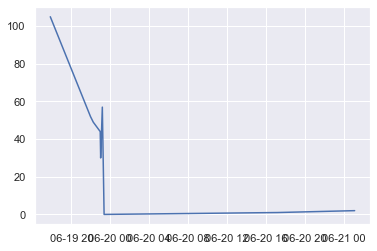

In [25]:
plt.plot(df4['评论时间'],df4['评论转发量'])

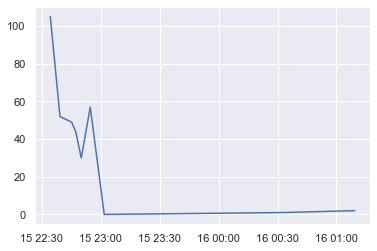

In [26]:
#观察一条推文的评论随着时间的变化
df5=df.loc[(df['推文地址']=='https://twitter.com/weijia/status/1195347666689036288')]
plt.plot(df5['评论时间'],df4['评论转发量'])

In [27]:
#所有数据随时间的分布情况
table = pd.pivot_table(df,index=['评论时间'],values=['评论地址'],aggfunc='count')

In [28]:
table.index

DatetimeIndex(['2019-06-01 00:50:04', '2019-06-01 00:50:27',
               '2019-06-01 00:50:34', '2019-06-01 00:50:46',
               '2019-06-01 00:50:47', '2019-06-01 00:51:08',
               '2019-06-01 00:51:34', '2019-06-01 00:51:44',
               '2019-06-01 00:52:05', '2019-06-01 00:52:46',
               ...
               '2019-12-06 14:49:06', '2019-12-06 15:01:24',
               '2019-12-06 15:13:12', '2019-12-06 15:36:02',
               '2019-12-06 15:40:53', '2019-12-06 15:49:12',
               '2019-12-06 15:51:29', '2019-12-06 16:11:36',
               '2019-12-06 16:27:50', '2019-12-06 16:35:37'],
              dtype='datetime64[ns]', name='评论时间', length=711649, freq=None)

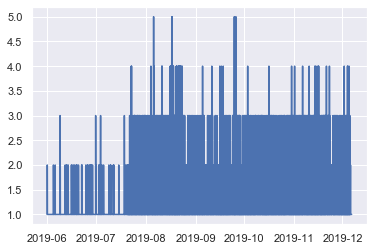

In [29]:
plt.plot(table.index,table['评论地址'],color='b')

In [30]:
pd.pivot_table(df,index=['推文地址'])

,评论点赞量,评论用户关注数,评论用户列表数,评论用户加入时间,评论用户喜欢数,评论用户推文数,评论用户正在关注数,评论评论量,评论转发量
推文地址,,,,,,,,,
https://twitter.com/11thHour/status/1186836849412706304,0.636364,757.090909,1.000000,41268.181818,24857.727273,26966.727273,1138.636364,0.272727,0.090909
https://twitter.com/11thHour/status/1186857818940411904,1.000000,99.555556,0.111111,42142.777778,9060.555556,4517.111111,402.888889,0.222222,0.000000
https://twitter.com/48hours/status/1175182880697389057,6.333333,2426.777778,1.000000,41469.666667,57174.111111,30499.666667,1061.222222,0.333333,0.000000
https://twitter.com/48hours/status/1175801933342228481,4.000000,128.400000,0.200000,40628.600000,4012.400000,6635.000000,336.800000,0.400000,0.000000
https://twitter.com/48hours/status/1196133288093667329,1.500000,591.400000,0.600000,41228.300000,24822.500000,22510.600000,1073.400000,0.000000,0.100000
...,...,...,...,...,...,...,...,...,...
https://twitter.com/weijia/status/1195347666689036288,0.222222,477.222222,0.222222,41946.888889,29443.444444,21358.666667,889.000000,0.000000,0.000000
https://twitter.com/weijia/status/1197164972276629505,367.600000,18121.400000,2.700000,41514.300000,64554.500000,48199.300000,1317.100000,26.400000,30.500000
https://twitter.com/weijia/status/1202235200870264833,0.200000,207.000000,0.600000,40719.800000,1913.600000,18266.400000,362.800000,0.200000,0.000000


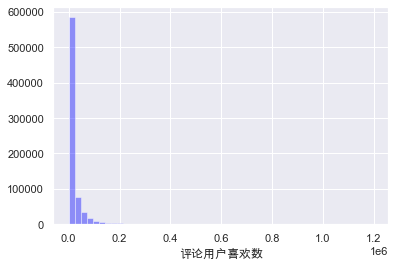

In [31]:
sns.distplot(df.评论用户喜欢数, kde=False ,color='blue')

### 评论时段

In [32]:
df['时段'] = df['评论时间'].apply(lambda x: x.strftime('%H'))

In [33]:
df['时段'] = pd.to_numeric(df['时段'])

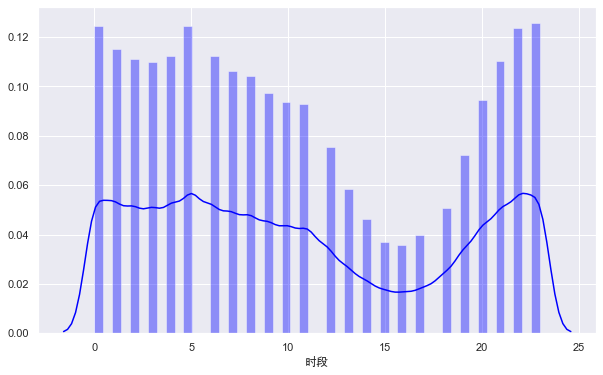

In [34]:
plt.figure(figsize=(10,6))
sns.distplot(df['时段'], kde=True, color='blue')

In [35]:
df['天数'] = df['评论时间'].dt.day_name()

In [36]:
gun_freq = df.groupby('天数').count()['评论用户ID']

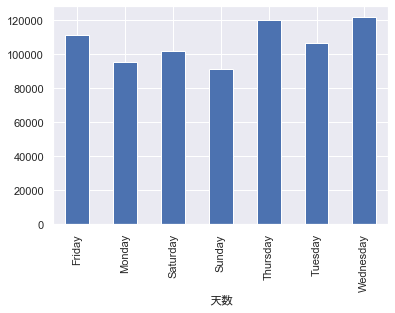

In [37]:
gun_freq.plot.bar(x='days', y='id')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747452 entries, 0 to 747451
Data columns (total 23 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   推文地址       747452 non-null  object        
 1   评论地址       747452 non-null  object        
 2   评论时间       747452 non-null  datetime64[ns]
 3   评论内容       747452 non-null  object        
 4   评论转发量      747452 non-null  int64         
 5   评论评论量      747452 non-null  int64         
 6   评论点赞量      747452 non-null  int64         
 7   评论类型       747452 non-null  object        
 8   评论附加信息     747452 non-null  object        
 9   评论用户ID     747452 non-null  object        
 10  评论用户名      745588 non-null  object        
 11  评论用户主页链接   747452 non-null  object        
 12  评论用户推文数    747452 non-null  int64         
 13  评论用户正在关注数  747452 non-null  int64         
 14  评论用户关注数    747452 non-null  int64         
 15  评论用户喜欢数    747452 non-null  int64         
 16  评论用户列表数    747452 no

### 用户信息分析

In [39]:
df.index = df['评论用户名']

In [40]:
user = df[['评论用户关注数', '评论用户推文数']]
user

,评论用户关注数,评论用户推文数
评论用户名,,
Robin Kumulaga,7,355
edohagbekokou,31,1512
RPG,84,2756
Diane Allen,243,5010
walt lindsay,39,4440
...,...,...
shin,8206,21421
ひじき,96,102
はゆは@加油 防衛研究推進を求める自由市民の会,658,32842


In [41]:
user['评论用户关注数'] = user['评论用户关注数'] +0.01

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
user['评论用户推文数'] = user['评论用户推文数'] +0.01

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
user = user.apply(lambda x:(x-min(x)) / (max(x)- min(x))) #doing standardization

In [44]:
user['评论用户关注数'] = user['评论用户关注数'] +0.01
user['评论用户推文数'] = user['评论用户推文数'] +0.01

In [45]:
user.head()

,评论用户关注数,评论用户推文数
评论用户名,,
Robin Kumulaga,0.010000,0.010173
edohagbekokou,0.010001,0.010736
RPG,0.010003,0.011342
Diane Allen,0.010008,0.012440
walt lindsay,0.010001,0.012162


In [46]:
score = user['评论用户关注数'] * user['评论用户推文数']
score

评论用户名
Robin Kumulaga                     0.000102
edohagbekokou                      0.000107
RPG                                0.000113
Diane Allen                        0.000125
walt lindsay                       0.000122
                                     ...   
shin                               0.000210
ひじき                                0.000101
はゆは@加油 防衛研究推進を求める自由市民の会            0.000261
ぽん太                                0.000100
浮木 盲亀　宗教法人幸福の科学信者(三帰会員)&幸福実現党党員    0.000224
Length: 747452, dtype: float64

In [47]:
score.sort_values(ascending = False)

评论用户名
The Associated Press    0.062625
Elon Musk               0.014716
Tim Fargo               0.012414
Paulasbarntiques        0.011321
Paulasbarntiques        0.011321
                          ...   
Steven Phillips         0.000100
Skeletor ??             0.000100
Blue Moon Anthology     0.000100
mozzersdad              0.000100
Johnny Harrell          0.000100
Length: 747452, dtype: float64

In [48]:
score[score>score.median() + score.std()/2].sort_values(ascending=False)

评论用户名
The Associated Press    0.062625
Elon Musk               0.014716
Tim Fargo               0.012414
Paulasbarntiques        0.011321
Paulasbarntiques        0.011321
                          ...   
Angela Jolene           0.000252
Lisa                    0.000252
Michelle Linn           0.000252
Powder Toast Man        0.000252
新開拓時代北海道                0.000252
Length: 108925, dtype: float64

In [49]:
score.median()

0.0001281909505967823

In [50]:
user['score'] =score

In [51]:
user['segment'] = np.where(user['score'] >=score.median() + score.std()/len(score) , 'A', 'B')
user


,评论用户关注数,评论用户推文数,score,segment
评论用户名,,,,
Robin Kumulaga,0.010000,0.010173,0.000102,B
edohagbekokou,0.010001,0.010736,0.000107,B
RPG,0.010003,0.011342,0.000113,B
Diane Allen,0.010008,0.012440,0.000125,B
walt lindsay,0.010001,0.012162,0.000122,B
...,...,...,...,...
shin,0.010275,0.020432,0.000210,A
ひじき,0.010003,0.010050,0.000101,B
はゆは@加油 防衛研究推進を求める自由市民の会,0.010022,0.025995,0.000261,A


### Text Mining 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747452 entries, Robin Kumulaga to 浮木 盲亀　宗教法人幸福の科学信者(三帰会員)&幸福実現党党員
Data columns (total 23 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   推文地址       747452 non-null  object        
 1   评论地址       747452 non-null  object        
 2   评论时间       747452 non-null  datetime64[ns]
 3   评论内容       747452 non-null  object        
 4   评论转发量      747452 non-null  int64         
 5   评论评论量      747452 non-null  int64         
 6   评论点赞量      747452 non-null  int64         
 7   评论类型       747452 non-null  object        
 8   评论附加信息     747452 non-null  object        
 9   评论用户ID     747452 non-null  object        
 10  评论用户名      745588 non-null  object        
 11  评论用户主页链接   747452 non-null  object        
 12  评论用户推文数    747452 non-null  int64         
 13  评论用户正在关注数  747452 non-null  int64         
 14  评论用户关注数    747452 non-null  int64         
 15  评论用户喜欢数    747452 non-null  int64  

In [53]:
df['评论内容'] = df['评论内容'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['评论内容'] = df['评论内容'].str.replace('[^\w\s]', '')

df['评论内容'] = df['评论内容'].str.replace('[\d]','')


import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['评论内容'] = df['评论内容'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
from textblob import Word
df['评论内容'] = df['评论内容'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()] ))

df['评论内容'] = df['评论内容'].str.replace('rt', '')

In [54]:
df.评论内容

评论用户名
Robin Kumulaga                               回复 ap_politics ap sometime tough friend
edohagbekokou                      回复 ap_politics ap bet didnt consult bo enterin...
RPG                                回复 ap_politics ap obama fond patrick obama pla...
Diane Allen                        回复 ap_politics ap everyone longs obama year bi...
walt lindsay                       回复 ap_politics ap quite irrelevant dems candid...
                                                         ...                        
shin                               回复 chowtingagnes 日本人はあなたたちを心から応援しています 負けないで頑張っ...
ひじき                                                     回复 chowtingagnes 明日どこでデモしますか
はゆは@加油 防衛研究推進を求める自由市民の会            回复 chowtingagnes 大変お疲れ様でした これでめでたしではないはずです 少しで...
ぽん太                                                       回复 chowtingagnes 頑張ってくださいね
浮木 盲亀　宗教法人幸福の科学信者(三帰会員)&幸福実現党党員                                 回复 chowtingagnes 頑張れ
Name: 评论内容, Length: 747452, dtype: object

可以对文字部分进行自然语言处理，计算情感分数，词频等

In [55]:
twitter2 = pd.read_excel('数据结果汇总/twitter评论2.xlsx')
twitter2

,推文原始url,评论url,评论时间,评论内容,评论转发量,评论评论量,评论点赞量,评论类型,评论附加信息,评论用户ID,...,评论用户主页链接,评论用户推文数,评论用户正在关注数,评论用户关注数,评论用户喜欢数,评论用户列表数,评论用户地域,评论用户简介,评论用户加入时间,评论用户生日
0,https://twitter.com/CNN/status/116606026011474...,https://twitter.com/debigroves61/status/116613...,2019-08-27 07:37:15,回复 @CNN I can’t wait. They should let all the ...,0,0,0,文本,"文本, 回复 @CNN",debigroves61,...,https://twitter.com/debigroves61,1400,73,13,97,0,NaN,"Under a Full Moon she had never felt crazy, sh...",40969.0,NaN
1,https://twitter.com/CNN/status/116606026011474...,https://twitter.com/Bahikabo/status/1166129741...,2019-08-27 07:26:10,回复 @CNN Who gives a shit about SNL. They are s...,0,0,0,文本,"文本, 回复 @CNN",Bahikabo,...,https://twitter.com/Bahikabo,39426,545,467,33017,0,NaN,"Married 33 years, Mom of 2, Gold Star Family, ...",39904.0,NaN
2,https://twitter.com/CNN/status/116606026011474...,https://twitter.com/See93032251/status/1166112...,2019-08-27 06:17:15,回复 @CNN Back when @snl was funny. Now just hat...,0,0,0,文本,"文本, 回复 @CNN",See93032251,...,https://twitter.com/See93032251,750,122,15,741,0,NaN,0 following from disagreement with Twitter. NO...,43647.0,NaN
3,https://twitter.com/CNN/status/116606026011474...,https://twitter.com/Ranker/status/116611108534...,2019-08-27 06:12:02,回复 @CNN SO excited that the legendary #EddieMu...,0,0,0,文本,"文本, 回复 @CNN",Ranker,...,https://twitter.com/Ranker,22959,1365,54998,37676,3,"Los Angeles, CA","You Vote, We Rank: Influence rankings in real ...",39995.0,NaN
4,https://twitter.com/CNN/status/116606026011474...,https://twitter.com/pativera06/status/11660867...,2019-08-27 04:35:20,回复 @CNN,0,0,0,文本,"文本, 回复 @CNN",pativera06,...,https://twitter.com/pativera06,10475,621,455,11747,0,"Asunción, Paraguay","Odontóloga, escorpiana, del horóscopo chino: T...",41275.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639996,https://twitter.com/CNN/status/116577712462973...,https://twitter.com/realJoseARios/status/11657...,2019-08-26 08:07:07,回复 @CNN Good luck pic.twitter.com/dKTskwrsEu,0,1,4,视频,"视频, 回复 @CNN",realJoseARios,...,https://twitter.com/realJoseARios,1065,296,47,7,2,"Florida, USA",Director of marketing@inviteinsurance Any view...,43405.0,NaN
639997,https://twitter.com/CNN/status/116577712462973...,https://twitter.com/keeganwozniak/status/11657...,2019-08-26 08:06:55,回复 @CNN This guys a joke. Pointless town hall,0,0,6,文本,"文本, 回复 @CNN",keeganwozniak,...,https://twitter.com/keeganwozniak,3892,441,235,5181,1,"New York, USA",New York | Follow or I’ll delete your Twitter ...,41244.0,NaN
639998,https://twitter.com/CNN/status/116577712462973...,https://twitter.com/FJWarriors/status/11657775...,2019-08-26 08:06:47,"回复 @CNN Not enough, but its a start",0,0,0,文本,"文本, 回复 @CNN",FJWarriors,...,https://twitter.com/FJWarriors,2798,110,16,2100,0,NaN,"Independent, calling out bullshit and waiting ...",43040.0,NaN
639999,https://twitter.com/CNN/status/116577712462973...,https://twitter.com/editor_wp/status/116577749...,2019-08-26 08:06:29,回复 @CNN I guess Democrat voters are dumb becau...,0,0,0,文本,"文本, 回复 @CNN",editor_wp,...,https://twitter.com/editor_wp,26363,1027,944,16499,0,United States,I'm so old it takes me an hour and a half to w...,43435.0,NaN


In [56]:
twitter3 = pd.read_excel('数据结果汇总/twitter评论3.xlsx')
twitter3

,推文原始url,评论url,评论时间,评论内容,评论转发量,评论评论量,评论点赞量,评论类型,评论附加信息,评论用户ID,...,评论用户主页链接,评论用户推文数,评论用户正在关注数,评论用户关注数,评论用户喜欢数,评论用户列表数,评论用户地域,评论用户简介,评论用户加入时间,评论用户生日
0,https://twitter.com/Kate61164505/status/119099...,https://twitter.com/swimmersamz/status/1191157...,2019-11-04 08:56:24,回复 @Rickchan220 @Kate61164505 No no send all o...,1,0,4,文本,"文本, 回复 @Rickchan220 @Kate61164505",swimmersamz,...,https://twitter.com/swimmersamz,3954,725,5957,20318,1,mount Bukit timah Singapore,Singapore guppy who loves to splash like magik...,39995.0,NaN
1,https://twitter.com/Kate61164505/status/119099...,https://twitter.com/Elladraws1/status/11910682...,2019-11-04 03:03:04,"回复 @Kate61164505 Yes, it is. And it's not the ...",9,0,15,视频,"视频, 回复 @Kate61164505",Elladraws1,...,https://twitter.com/Elladraws1,6895,1060,1082,17708,0,NaN,HKer. Hetalia and Jojo fan. Amateur artist. En...,43252.0,NaN
2,https://twitter.com/Kate61164505/status/119099...,https://twitter.com/eellhk/status/119103133185...,2019-11-04 00:36:12,回复 @mickey16194489 @Kate61164505 Male police i...,2,0,7,文本,"文本, 回复 @mickey16194489 @Kate61164505",eellhk,...,https://twitter.com/eellhk,1207,115,172,1152,0,NaN,NaN,43678.0,NaN
3,https://twitter.com/Kate61164505/status/119099...,https://twitter.com/bandgirlagogo/status/11910...,2019-11-04 00:29:00,回复 @Cc12349565153 @Kate61164505 HK has no diff...,2,0,5,文本,"文本, 回复 @Cc12349565153 @Kate61164505",bandgirlagogo,...,https://twitter.com/bandgirlagogo,3403,2275,1476,3071,1,Hong Kong,a hongkonger fighting for freedom #standwithho...,43709.0,NaN
4,https://twitter.com/Kate61164505/status/119099...,https://twitter.com/DanaT29603998/status/11910...,2019-11-03 23:47:52,回复 @Hongkongeryi @Kate61164505 Hong kong polic...,1,0,2,文本,"文本, 回复 @Hongkongeryi @Kate61164505",DanaT29603998,...,https://twitter.com/DanaT29603998,4395,416,422,2572,0,NaN,A HongKonger,43678.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550286,https://twitter.com/CNN/status/119626553617229...,https://twitter.com/ct_ramos1203/status/119626...,2019-11-18 11:17:35,回复 @CNN #freequilty,0,0,1,文本,"文本, 回复 @CNN",ct_ramos1203,...,https://twitter.com/ct_ramos1203,422,15,5,1131,0,Somewhere on Earth,Just a guy enjoying all the twitter drama • Mo...,43435.0,NaN
550287,https://twitter.com/CNN/status/119626553617229...,https://twitter.com/linuskitty2/status/1196266...,2019-11-18 11:17:33,回复 @CNN Love it.,0,0,0,文本,"文本, 回复 @CNN",linuskitty2,...,https://twitter.com/linuskitty2,1476,30,5,37,0,"ontario ,canada",NaN,40299.0,NaN
550288,https://twitter.com/CNN/status/119626553617229...,https://twitter.com/snake21190364/status/11962...,2019-11-18 11:17:21,回复 @CNN want to have one,0,0,0,文本,"文本, 回复 @CNN",snake21190364,...,https://twitter.com/snake21190364,6,24,6,0,0,People's Republic of China,维和维和,43709.0,NaN
550289,https://twitter.com/CNN/status/119626553617229...,https://twitter.com/JosephTClemens1/status/119...,2019-11-18 11:16:36,回复 @CNN He's quite the little cat freedom figh...,0,0,4,文本,"文本, 回复 @CNN",JosephTClemens1,...,https://twitter.com/JosephTClemens1,760,109,25,190,0,NaN,"Long Time Trump supporter, who has decided to ...",43770.0,NaN


## 微博数据分析

In [57]:
weibo = pd.read_excel('数据结果汇总/传统媒体微博数据.xlsx')
weibo.head()

,uid,昵称,粉丝数,关注数,微博数,bid,url,内容,转发数,评论数,...,原微博昵称,原微博来源,原日期,原转发,原评论,原点赞,原创url,原创内容,视频地址,图片地址
0,1181382331,驻香港部队,1087524,69,354,Ijtkd1nLG,http://weibo.com/1181382331/Ijtkd1nLG,#退伍季#【老兵^珍重】这首原创是我近年听到最好的军旅歌曲。老兵们^愿你出走半生^归去仍是少年,57,89,...,港岛奇兵,HUAWEI P30 Pro,2019-12-05 19:04:52,105,64,131,http://weibo.com/6057919519/IjohrFosg?refer_fl...,#港叔故事#【离别】如果听完了这首歌^会发现老王和老李^其实就是我和你^一个忙着打背包^一个...,NaN,NaN
1,1181382331,驻香港部队,1087524,69,354,IjkmuCwC9,http://weibo.com/1181382331/IjkmuCwC9,#早安香港#【早晨】多发现生活的美^各位早安。????,20,196,...,NaN,NaN,NaT,0,0,0,NaN,NaN,NaN,http://wx4.sinaimg.cn/orj360/466a76bbly1g9lkm3...
2,1181382331,驻香港部队,1087524,69,354,Ij13Pjxk6,http://weibo.com/1181382331/Ij13Pjxk6,#早安香港#【早晨】愿大家都有好心情^诸君早安????,22,297,...,NaN,NaN,NaT,0,0,0,NaN,NaN,NaN,http://wx2.sinaimg.cn/orj360/466a76bbgy1g9j7ep...
3,1181382331,驻香港部队,1087524,69,354,Iiq0tySaT,http://weibo.com/1181382331/Iiq0tySaT,#平凡英雄#【军营达人】业精于勤荒于嬉^手中武器要熟悉,62,126,...,港岛奇兵,HUAWEI P30 Pro,2019-11-29 08:56:56,75,42,238,http://weibo.com/6057919519/IipJI2UsS?refer_fl...,#挑战全网#【军营达人】驻港部队小哥哥拆组枪支^有人能pk吗？L港岛奇兵的微博视频????,NaN,NaN
4,1181382331,驻香港部队,1087524,69,354,Ii7Bwh3Ca,http://weibo.com/1181382331/Ii7Bwh3Ca,我是第13位申请创建^【超话】香江砺剑^→香江砺剑超话的粉丝^助力创建人数越多^开通几率越...,20,164,...,NaN,NaN,NaT,0,0,0,NaN,NaN,NaN,NaN


In [58]:
weibo.describe()

,uid,粉丝数,关注数,微博数,转发数,评论数,点赞数,原创,原微博uid,原转发,原评论,原点赞
count,1.887100e+04,1.887100e+04,18871.000000,18871.000000,18871.000000,18871.000000,18871.000000,18871.000000,4.600000e+02,1.887100e+04,18871.000000,1.887100e+04
mean,3.341490e+09,6.594983e+06,1078.128981,61361.222670,178.959780,156.452864,563.768322,0.975571,3.980061e+09,6.745751e+02,83.338403,6.618793e+02
std,1.769357e+09,4.352708e+06,385.505430,36791.693902,956.259148,464.769166,2823.760165,0.154381,2.180654e+09,7.734162e+04,4863.304543,5.122942e+04
min,1.181382e+09,7.449800e+04,69.000000,354.000000,0.000000,0.000000,0.000000,0.000000,1.010712e+09,0.000000e+00,0.000000,0.000000e+00
25%,1.887344e+09,1.621924e+06,1114.000000,30736.000000,2.000000,2.000000,7.000000,1.000000,1.887344e+09,0.000000e+00,0.000000,0.000000e+00
50%,1.914880e+09,9.626187e+06,1190.000000,61947.000000,65.000000,55.000000,174.000000,1.000000,2.803302e+09,0.000000e+00,0.000000,0.000000e+00
75%,5.507836e+09,9.626187e+06,1190.000000,98166.000000,150.000000,161.000000,436.000000,1.000000,6.485618e+09,0.000000e+00,0.000000,0.000000e+00
max,5.617030e+09,1.009522e+07,1722.000000,98166.000000,66999.000000,21430.000000,137093.000000,1.000000,7.327929e+09,1.060794e+07,545554.000000,6.665240e+06


In [59]:
weibo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   uid     18871 non-null  int64         
 1   昵称      18871 non-null  object        
 2   粉丝数     18871 non-null  int64         
 3   关注数     18871 non-null  int64         
 4   微博数     18871 non-null  int64         
 5   bid     18871 non-null  object        
 6   url     18871 non-null  object        
 7   内容      18853 non-null  object        
 8   转发数     18871 non-null  int64         
 9   评论数     18871 non-null  int64         
 10  点赞数     18871 non-null  int64         
 11  发布时间    18871 non-null  datetime64[ns]
 12  来源      17555 non-null  object        
 13  原创      18871 non-null  int64         
 14  原微博uid  460 non-null    float64       
 15  原微博昵称   460 non-null    object        
 16  原微博来源   433 non-null    object        
 17  原日期     460 non-null    datetime64[ns]
 18  原转发   

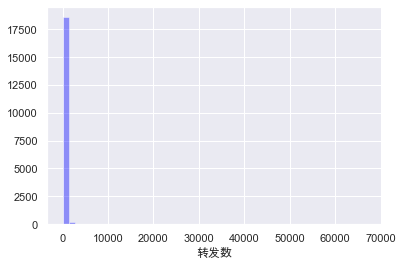

In [60]:
sns.distplot(weibo.转发数, kde=False ,color='blue')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']#解决中文乱码问题

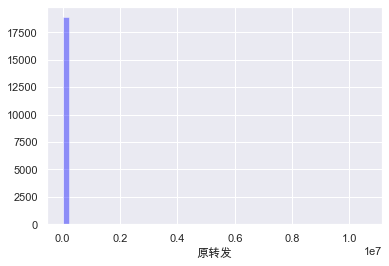

In [61]:
sns.distplot(weibo.原转发, kde=False ,color='blue')

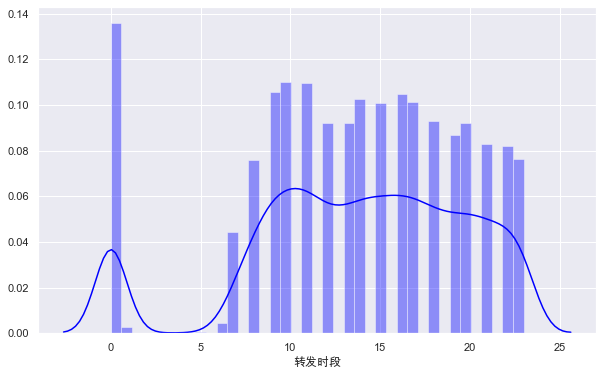

In [62]:
weibo['转发时段'] = weibo['发布时间'].apply(lambda x: x.strftime('%H'))
weibo['转发时段'] = pd.to_numeric(weibo['转发时段'])
plt.figure(figsize=(10,6))
sns.distplot(weibo['转发时段'], kde=True, color='blue')

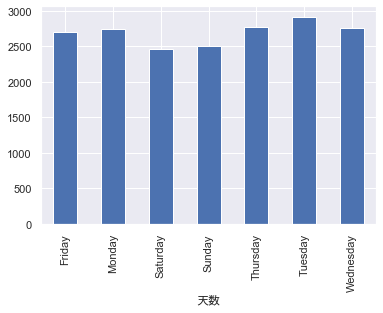

In [63]:
weibo['天数'] = weibo['发布时间'].dt.day_name()
gun_freq = weibo.groupby('天数').count()['bid']
gun_freq.plot.bar(x='天数', y='id')

In [64]:
source_freq = weibo.groupby('来源').count()['bid'].sort_values(ascending= False)
source_freq

来源
微博 weibo.com          10172
360安全浏览器               1775
专业版微博                  1683
iPhone客户端               934
祖国反黑站超话                 517
HUAWEI Mate 10 Pro      424
iPhone 7 Plus           333
HUAWEI P20 Pro          213
iPhone X                195
微博视频                    135
OnePlus 7 Pro           133
iPhone XR               126
搜狗高速浏览器                 122
秒拍客户端                   113
小米MIX 2 全面屏手机            96
HUAWEI Mate 20           81
HUAWEI P30 Pro           71
一直播主站                    65
iPhone 8                 61
iPhone 8 Plus            58
荣耀V9 我想要的快               49
HUAWEI P30               32
目睹直播                     27
橙新闻超话                    22
iPhone 11 Pro            15
三星Galaxy S10             15
HUAWEI Mate 30 Pro       14
一直播Yi                     9
微博抽奖平台                    8
vivo NEX AI智慧旗舰           8
秒拍网页版                     7
bShare分享                  7
微博搜索                      6
微博 HTML5 版                5
微博云剪                      4
超话               

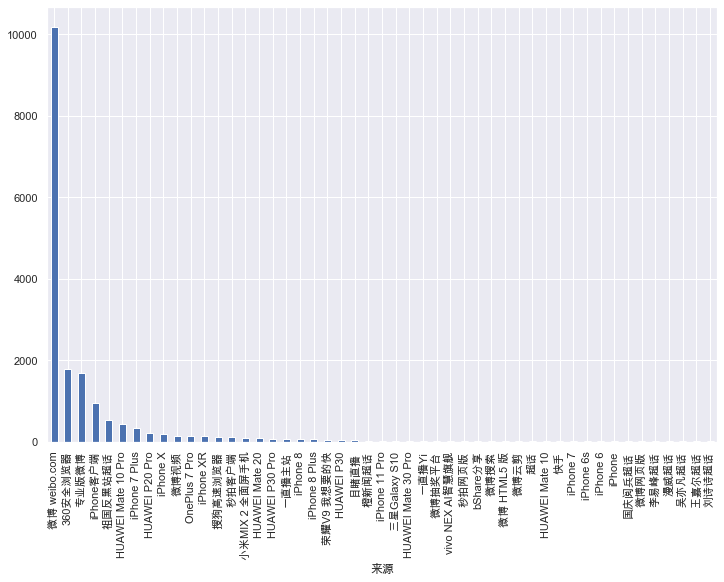

In [65]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
source_freq.plot.bar(x='来源', y='bid')

In [66]:
weibo.corr()

,uid,粉丝数,关注数,微博数,转发数,评论数,点赞数,原创,原微博uid,原转发,原评论,原点赞,转发时段
uid,1.000000,-0.294814,-0.614186,-0.891077,-0.060327,-0.143336,-0.009513,0.060782,0.034817,-0.008384,-0.001948,0.006933,-0.163357
粉丝数,-0.294814,1.000000,0.398154,0.633478,0.121473,0.224402,0.128478,-0.031717,0.059691,-0.008856,-0.003955,0.002171,0.331652
关注数,-0.614186,0.398154,1.000000,0.614755,0.028303,0.066275,0.019586,0.033127,-0.095371,-0.019543,-0.018705,-0.008078,0.225120
微博数,-0.891077,0.633478,0.614755,1.000000,0.087559,0.201873,0.040905,-0.033217,-0.069173,-0.012573,-0.014381,-0.011477,0.235553
转发数,-0.060327,0.121473,0.028303,0.087559,1.000000,0.639865,0.465669,-0.005222,0.091461,0.003544,0.006163,0.001699,0.053697
评论数,-0.143336,0.224402,0.066275,0.201873,0.639865,1.000000,0.597923,0.015691,0.010181,0.001532,0.000092,-0.001938,0.080604
点赞数,-0.009513,0.128478,0.019586,0.040905,0.465669,0.597923,1.000000,0.010824,0.143732,0.006702,0.005273,0.001109,0.057083
原创,0.060782,-0.031717,0.033127,-0.033217,-0.005222,0.015691,0.010824,1.000000,NaN,-0.055119,-0.108293,-0.081648,-0.045685
原微博uid,0.034817,0.059691,-0.095371,-0.069173,0.091461,0.010181,0.143732,NaN,1.000000,-0.028739,-0.040091,-0.035467,0.041606
原转发,-0.008384,-0.008856,-0.019543,-0.012573,0.003544,0.001532,0.006702,-0.055119,-0.028739,1.000000,0.846069,0.355761,0.006547


In [67]:
weibo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   uid     18871 non-null  int64         
 1   昵称      18871 non-null  object        
 2   粉丝数     18871 non-null  int64         
 3   关注数     18871 non-null  int64         
 4   微博数     18871 non-null  int64         
 5   bid     18871 non-null  object        
 6   url     18871 non-null  object        
 7   内容      18853 non-null  object        
 8   转发数     18871 non-null  int64         
 9   评论数     18871 non-null  int64         
 10  点赞数     18871 non-null  int64         
 11  发布时间    18871 non-null  datetime64[ns]
 12  来源      17555 non-null  object        
 13  原创      18871 non-null  int64         
 14  原微博uid  460 non-null    float64       
 15  原微博昵称   460 non-null    object        
 16  原微博来源   433 non-null    object        
 17  原日期     460 non-null    datetime64[ns]
 18  原转发   

In [68]:
name={'uid': 'uid',
'昵称':'昵称', 
'粉丝数':'粉丝数',
'关注数':'关注数',
'微博数': '微博数',
'bid' :'bid',
'url' : 'url',
'内容'  :'内容',
'转发数' :'转发数',
'评论数' : '评论数',
'点赞数' :'点赞数',
'发布时间' :'发布时间',
'来源' : '来源',
'原创' :'原创',
'原微博uid'  :'原微博uid',
'原微博昵称' : '原微博昵称',
'原微博来源' : '原微博来源',
'原日期'  : '原日期',
'原转发' : '原转发',
'原评论':'原评论',
'原点赞': '原点赞',
     '原创url':'原创url',
     '原创内容':'原创内容',
     '视频地址':'视频地址',
     '图片地址':'图片地址',
     '转发时段转发时段':'转发时段'}
weibo=weibo.rename(columns=name)

In [69]:
wcor=weibo.drop(['uid','昵称','原微博uid','原微博昵称','原微博来源','原日期','原创url','转发时段','天数'],axis=1)
wcor=wcor.corr()

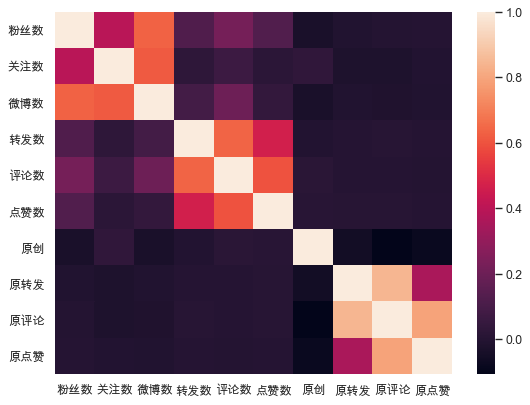

In [70]:
plt.figure(figsize=(8, 6),dpi=80)
sns.heatmap(data=wcor)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']#解决中文乱码问题

In [71]:
#所有数据随时间的分布情况
table = pd.pivot_table(weibo,index=['发布时间'],values=['bid'],aggfunc='count')

In [72]:
table.index

DatetimeIndex(['2019-06-01 00:02:03', '2019-06-01 00:03:03',
               '2019-06-01 00:04:03', '2019-06-01 00:05:03',
               '2019-06-01 00:06:03', '2019-06-01 00:07:03',
               '2019-06-01 00:08:03', '2019-06-01 00:09:03',
               '2019-06-01 00:12:10', '2019-06-01 07:18:38',
               ...
               '2019-12-06 22:01:04', '2019-12-06 22:10:16',
               '2019-12-06 22:25:40', '2019-12-06 22:38:23',
               '2019-12-06 22:52:11', '2019-12-06 23:05:04',
               '2019-12-06 23:19:25', '2019-12-06 23:30:04',
               '2019-12-06 23:43:39', '2019-12-06 23:58:03'],
              dtype='datetime64[ns]', name='发布时间', length=18801, freq=None)

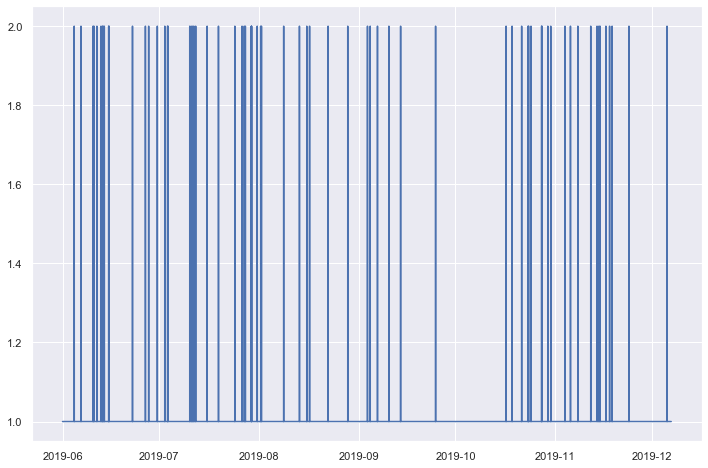

In [73]:
plt.plot(table.index,table['bid'],color='b')

In [74]:
users_kind=weibo['昵称'].value_counts()
users_kind

观察者网       8660
中国长安网      3624
橙新聞        2657
文汇报        2363
星島日報歐洲版    1394
驻香港部队       173
Name: 昵称, dtype: int64

In [75]:
import matplotlib.pyplot as plt

In [76]:
labels = ['观察者网', '中国长安网', '橙新聞', '文汇报', '星島日報歐洲版', '驻香港部队']
sizes=users_kind
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

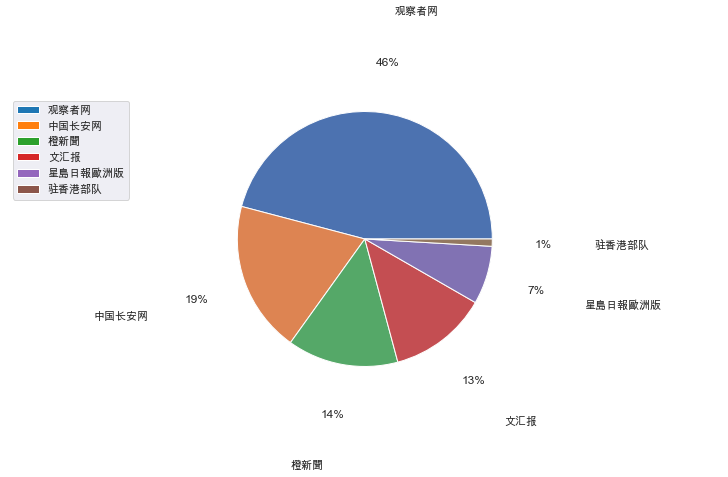

In [77]:
patches, texts = plt.pie(sizes, colors=colors, shadow=False, startangle=90)
plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.4, labeldistance=1.8)
plt.legend(patches, labels, loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.show()

可以按照这6个微博用户分类来研究数据
- 

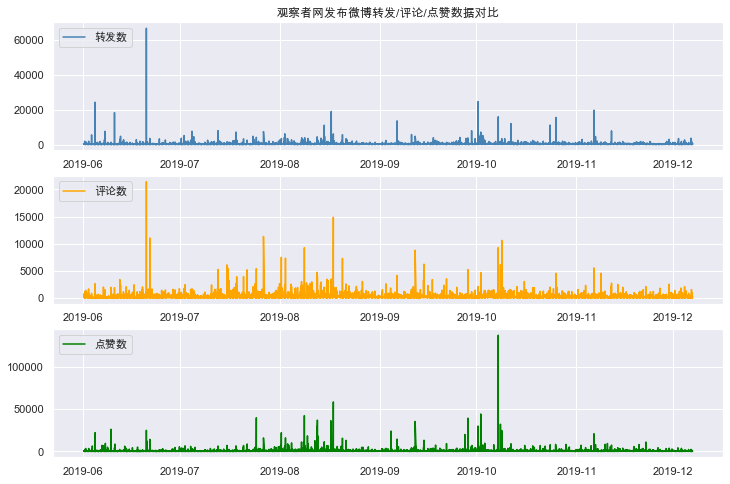

In [78]:
#观察微博被转发数随着时间的变化
import pylab as pl
gcz=weibo.loc[(weibo['昵称']=='观察者网')]
fig1 = pl.subplot(311)
plt.plot(gcz['发布时间'],gcz['转发数'],label='转发数',color='steelblue')
plt.title("观察者网发布微博转发/评论/点赞数据对比")
plt.legend(loc="upper left")

fig2 = pl.subplot(312)
plt.plot(gcz['发布时间'],gcz['评论数'],label='评论数',color='orange')
plt.legend(loc="upper left")

fig3 = pl.subplot(313)
plt.plot(gcz['发布时间'],gcz['点赞数'],label='点赞数',color='green')
plt.legend(loc="upper left")

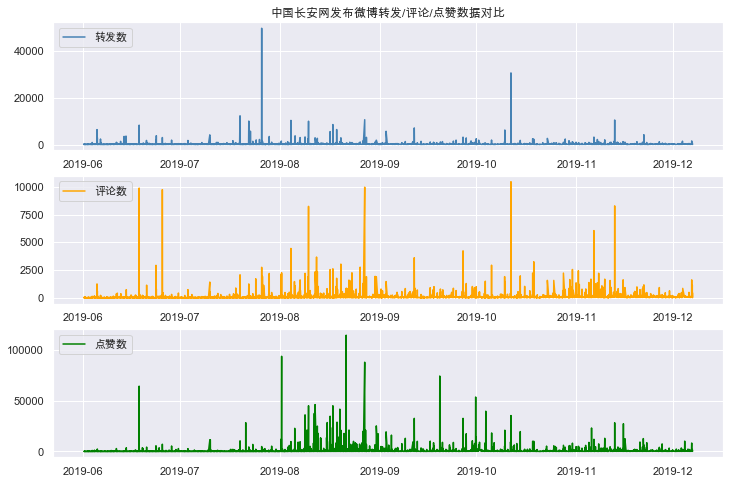

In [79]:
caw=weibo.loc[(weibo['昵称']=='中国长安网')]
fig1 = pl.subplot(311)
plt.plot(caw['发布时间'],caw['转发数'],label='转发数',color='steelblue')
plt.title("中国长安网发布微博转发/评论/点赞数据对比")
plt.legend(loc="upper left")

fig2 = pl.subplot(312)
plt.plot(caw['发布时间'],caw['评论数'],label='评论数',color='orange')
plt.legend(loc="upper left")

fig3 = pl.subplot(313)
plt.plot(caw['发布时间'],caw['点赞数'],label='点赞数',color='green')
plt.legend(loc="upper left")

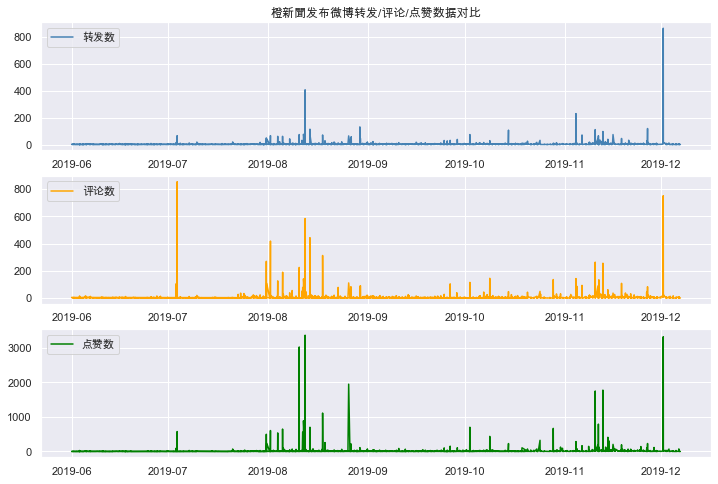

In [80]:
cxw=weibo.loc[(weibo['昵称']=='橙新聞')]
fig1 = pl.subplot(311)
plt.plot(cxw['发布时间'],cxw['转发数'],label='转发数',color='steelblue')
plt.title("橙新聞发布微博转发/评论/点赞数据对比")
plt.legend(loc="upper left")

fig2 = pl.subplot(312)
plt.plot(cxw['发布时间'],cxw['评论数'],label='评论数',color='orange')
plt.legend(loc="upper left")

fig3 = pl.subplot(313)
plt.plot(cxw['发布时间'],cxw['点赞数'],label='点赞数',color='green')
plt.legend(loc="upper left")

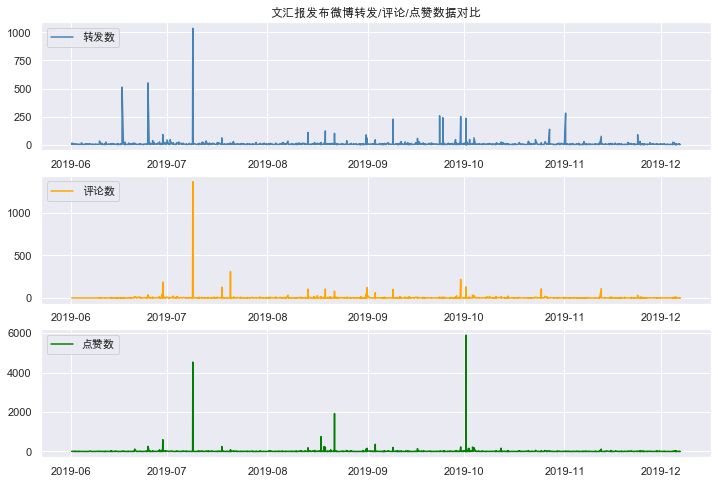

In [81]:
xhb=weibo.loc[(weibo['昵称']=='文汇报')]
fig1 = pl.subplot(311)
plt.plot(xhb['发布时间'],xhb['转发数'],label='转发数',color='steelblue')
plt.title("文汇报发布微博转发/评论/点赞数据对比")
plt.legend(loc="upper left")

fig2 = pl.subplot(312)
plt.plot(xhb['发布时间'],xhb['评论数'],label='评论数',color='orange')
plt.legend(loc="upper left")

fig3 = pl.subplot(313)
plt.plot(xhb['发布时间'],xhb['点赞数'],label='点赞数',color='green')
plt.legend(loc="upper left")

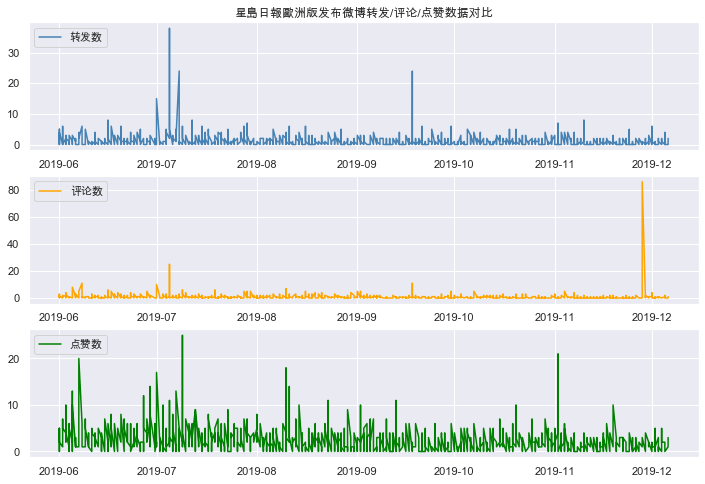

In [82]:
xdrb=weibo.loc[(weibo['昵称']=='星島日報歐洲版')]
fig1 = pl.subplot(311)
plt.plot(xdrb['发布时间'],xdrb['转发数'],label='转发数',color='steelblue')
plt.title("星島日報歐洲版发布微博转发/评论/点赞数据对比")
plt.legend(loc="upper left")

fig2 = pl.subplot(312)
plt.plot(xdrb['发布时间'],xdrb['评论数'],label='评论数',color='orange')
plt.legend(loc="upper left")

fig3 = pl.subplot(313)
plt.plot(xdrb['发布时间'],xdrb['点赞数'],label='点赞数',color='green')
plt.legend(loc="upper left")

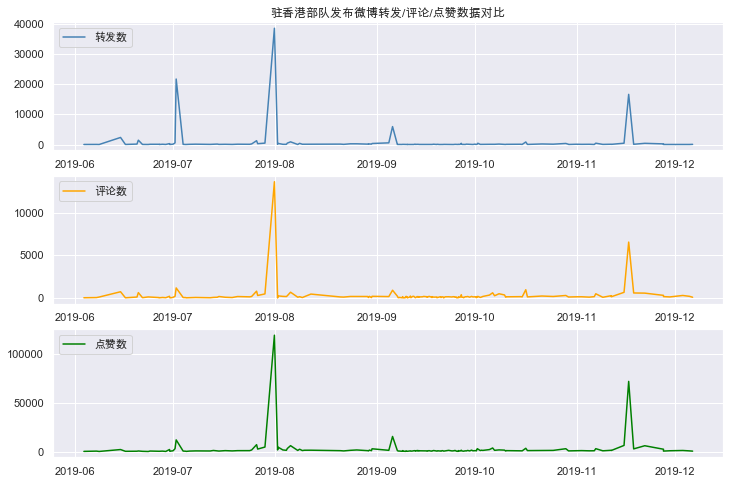

In [83]:
zgbd=weibo.loc[(weibo['昵称']=='驻香港部队')]
fig1 = pl.subplot(311)
plt.plot(zgbd['发布时间'],zgbd['转发数'],label='转发数',color='steelblue')
plt.title("驻香港部队发布微博转发/评论/点赞数据对比")
plt.legend(loc="upper left")

fig2 = pl.subplot(312)
plt.plot(zgbd['发布时间'],zgbd['评论数'],label='评论数',color='orange')
plt.legend(loc="upper left")

fig3 = pl.subplot(313)
plt.plot(zgbd['发布时间'],zgbd['点赞数'],label='点赞数',color='green')
plt.legend(loc="upper left")

## Remaining DataSet

In [84]:
ethic_wechat = pd.read_excel('数据结果汇总/宗教领袖微信数据.xlsx')
ethic_wechat.head()

,name,wx_name,nickname_id,posttime,title,url,get_time,readnum,likenum,top
0,黄信阳道长,xinyangdaozhang,1,2019-09-02 05:00:00,心安身自在，心宽福自来,http://mp.weixin.qq.com/s?__biz=MzA3MzQ0NDAwMw...,2019-09-02 05:00:00,2882,52,1
1,黄信阳道长,xinyangdaozhang,1,2019-09-01 05:00:00,《富春山居图》中的道教情缘,http://mp.weixin.qq.com/s?__biz=MzA3MzQ0NDAwMw...,2019-09-01 05:00:00,1058,16,1
2,黄信阳道长,xinyangdaozhang,1,2019-09-22 05:00:00,人生到头终是“朴”,http://mp.weixin.qq.com/s?__biz=MzA3MzQ0NDAwMw...,2019-09-22 05:00:00,3156,72,1
3,黄信阳道长,xinyangdaozhang,1,2019-07-02 05:00:00,真正的富有，是你内心的安宁,http://mp.weixin.qq.com/s?__biz=MzA3MzQ0NDAwMw...,2019-07-02 05:00:00,5444,88,1
4,黄信阳道长,xinyangdaozhang,1,2019-11-30 07:25:57,明道之人， 不刻意就好,http://mp.weixin.qq.com/s?__biz=MzA3MzQ0NDAwMw...,2019-11-30 07:25:57,1906,67,1


In [85]:
ethic_weibo = pd.read_excel('数据结果汇总/宗教领袖微博数据.xlsx')
ethic_weibo.head()

,uid,昵称,粉丝数,关注数,微博数,bid,url,内容,转发数,评论数,...,原微博昵称,原微博来源,原日期,原转发,原评论,原点赞,原创url,原创内容,视频地址,图片地址
0,1084720715,郑罗航道长,30106,69,176,IitpQ4oy1,http://weibo.com/1084720715/IitpQ4oy1,分享视频L郑罗航道长的微博视频????,0,0,...,NaN,NaN,NaT,0,0,0,NaN,NaN,http://f.video.weibocdn.com/003odCYnlx07yXJWHm...,NaN
1,1084720715,郑罗航道长,30106,69,176,IhSbb9olZ,http://weibo.com/1084720715/IhSbb9olZ,人生中出现的一切^都无法占有^只能经历。L郑罗航道长的微博视频????,0,2,...,NaN,NaN,NaT,0,0,0,NaN,NaN,http://f.video.weibocdn.com/000UvSwElx07yRPtMo...,NaN
2,1084720715,郑罗航道长,30106,69,176,IfZeknLEj,http://weibo.com/1084720715/IfZeknLEj,我自忘神心自悦跨水穿云来相谒不问黄芽肘后方妙道通微怎生说L郑罗航道长的微博视频????,0,0,...,NaN,NaN,NaT,0,0,0,NaN,NaN,http://f.video.weibocdn.com/002RHTaAlx07yy2HbP...,NaN
3,1084720715,郑罗航道长,30106,69,176,IfgGAdg1U,http://weibo.com/1084720715/IfgGAdg1U,你有你的背景！我有我的故事！没有读懂我的故事！请别给我多余的评价！????,0,0,...,NaN,NaN,NaT,0,0,0,NaN,NaN,NaN,http://wx3.sinaimg.cn/orj360/40a7864bgy1g8qpj9...
4,1084720715,郑罗航道长,30106,69,176,IdJtJfq7Q,http://weibo.com/1084720715/IdJtJfq7Q,恭贺L郑罗航道长的微博视频????,0,2,...,NaN,NaN,NaT,0,0,0,NaN,NaN,http://f.video.weibocdn.com/000SXKsQlx07yaoLcZ...,NaN


In [86]:
social_sc = pd.read_excel('数据结果汇总/社科院海外账号结果.xlsx')
social_sc.head()

,序号,宗教领袖人名,Twitter网页链接,账号id,Unnamed: 4,账号id-去重,Unnamed: 6
0,25,仝玲,https://twitter.com/VictoriaManor6,VictoriaManor6,NaN,TicToc,账号不存在
1,26,刘贻,https://twitter.com/Frfrancisliu,Frfrancisliu,NaN,VictoriaManor6,NaN
2,31,Boyaki,https://twitter.com/ichurch_me,ichurch_me,NaN,Frfrancisliu,NaN
3,32,公孙道长,https://twitter.com/nimeidedaye,nimeidedaye,NaN,ichurch_me,NaN
4,34,释明空带法师,https://twitter.com/176251800we/with_replies,176251800we,NaN,nimeidedaye,NaN


In [87]:
social_sc.info

<bound method DataFrame.info of       序号          宗教领袖人名                                   Twitter网页链接  \
0     25              仝玲            https://twitter.com/VictoriaManor6   
1     26              刘贻              https://twitter.com/Frfrancisliu   
2     31          Boyaki                https://twitter.com/ichurch_me   
3     32            公孙道长               https://twitter.com/nimeidedaye   
4     34          释明空带法师  https://twitter.com/176251800we/with_replies   
..   ...             ...                                           ...   
333   96        NTD News                  https://twitter.com/news_ntd   
334   97        Inquirer            https://twitter.com/inquirerdotnet   
335   98  Breitbart News             https://twitter.com/BreitbartNews   
336   99       The Times                  https://twitter.com/thetimes   
337  100       KPBS News                  https://twitter.com/KPBSnews   

               账号id Unnamed: 4         账号id-去重 Unnamed: 6  
0    VictoriaManor6

In [88]:
social_sc.head(100)

,序号,宗教领袖人名,Twitter网页链接,账号id,Unnamed: 4,账号id-去重,Unnamed: 6
0,25,仝玲,https://twitter.com/VictoriaManor6,VictoriaManor6,NaN,TicToc,账号不存在
1,26,刘贻,https://twitter.com/Frfrancisliu,Frfrancisliu,NaN,VictoriaManor6,NaN
2,31,Boyaki,https://twitter.com/ichurch_me,ichurch_me,NaN,Frfrancisliu,NaN
3,32,公孙道长,https://twitter.com/nimeidedaye,nimeidedaye,NaN,ichurch_me,NaN
4,34,释明空带法师,https://twitter.com/176251800we/with_replies,176251800we,NaN,nimeidedaye,NaN
...,...,...,...,...,...,...,...
95,54,Ron Wright,https://twitter.com/RepRonWright,RepRonWright,NaN,RepRonWright,NaN
96,55,Mario Diaz-Balart,https://twitter.com/MarioDB,MarioDB,NaN,GReschenthaler,NaN
97,56,Guy Reschenthaler,https://twitter.com/GReschenthaler,GReschenthaler,NaN,RepRalphNorman,NaN
98,57,Ralph Norman,https://twitter.com/RepRalphNorman,RepRalphNorman,NaN,SenatorDurbin,NaN


In [89]:
social_sc['账号id'].value_counts()

fatherz            2
enoch_tw           2
MarioDB            2
BreitbartNews      2
galileocheng       2
                  ..
TheBrandonMorse    1
rthk_enews         1
zaobaosg           1
Independent        1
ltntw              1
Name: 账号id, Length: 332, dtype: int64

In [90]:
social_sc['账号id-去重'].value_counts()

DanRather        1
Beaking_News     1
StandNewsHK      1
Hallelujah800    1
nimeidedaye      1
                ..
zaobaosg         1
Independent      1
TomiLahren       1
XHNews           1
ltntw            1
Name: 账号id-去重, Length: 332, dtype: int64

In [91]:
social_sc['Unnamed: 4'].value_counts()

账号不存在    1
Name: Unnamed: 4, dtype: int64

In [92]:
social_sc['Unnamed: 6'].value_counts()

账号不存在    1
Name: Unnamed: 6, dtype: int64

In [93]:
sheetName='推特'
social_tw = pd.read_excel('数据结果汇总/社科院海外账号结果.xlsx',sheet_name=sheetName)
social_tw

,序号,宗教领袖人名,Twitter网页链接,账号id,Unnamed: 4,账号id-去重,Unnamed: 6
0,25,仝玲,https://twitter.com/VictoriaManor6,VictoriaManor6,NaN,TicToc,账号不存在
1,26,刘贻,https://twitter.com/Frfrancisliu,Frfrancisliu,NaN,VictoriaManor6,NaN
2,31,Boyaki,https://twitter.com/ichurch_me,ichurch_me,NaN,Frfrancisliu,NaN
3,32,公孙道长,https://twitter.com/nimeidedaye,nimeidedaye,NaN,ichurch_me,NaN
4,34,释明空带法师,https://twitter.com/176251800we/with_replies,176251800we,NaN,nimeidedaye,NaN
...,...,...,...,...,...,...,...
333,96,NTD News,https://twitter.com/news_ntd,news_ntd,NaN,NaN,NaN
334,97,Inquirer,https://twitter.com/inquirerdotnet,inquirerdotnet,NaN,NaN,NaN
335,98,Breitbart News,https://twitter.com/BreitbartNews,BreitbartNews,NaN,NaN,NaN
336,99,The Times,https://twitter.com/thetimes,thetimes,NaN,NaN,NaN


In [94]:
sheetName='脸书'
social_fb = pd.read_excel('数据结果汇总/社科院海外账号结果.xlsx',sheet_name=sheetName)
social_fb

,序号,商界人名,网页链接,账号ID,Unnamed: 4
0,2,梁安琪,https://www.facebook.com/Angela-Leong-On-Kei-%...,Angela-Leong-On-Kei-梁安琪-308879615906116,NaN
1,3,郭台铭,https://www.facebook.com/TerryGou1018/,TerryGou1018,NaN
2,4,王维基,https://www.facebook.com/RickyWongWaiKay/,RickyWongWaiKay,NaN
3,5,李嘉诚,https://www.facebook.com/likashing0001/,likashing0001,NaN
4,11,魏应充,https://www.facebook.com/wei.sincere/,wei.sincere,NaN
5,12,蔡衍明,https://www.facebook.com/WWLoveTW/,WWLoveTW,保留
6,14,尹衍梁,https://www.facebook.com/%E5%B0%B9%E8%A1%8D%E6...,尹衍樑-342811529063523,NaN
7,15,赵藤雄,https://www.facebook.com/%E8%B6%99%E8%97%A4%E9...,趙藤雄-經典人生之旅-140424823474875,NaN
8,45,联合新闻网,https://www.facebook.com/myudn,myudn,保留
9,46,中时电子报,https://www.facebook.com/CTfans,CTfans,保留


In [95]:
sheetName='fb账号基本信息'
social_fbinfo = pd.read_excel('数据结果汇总/社科院海外账号结果.xlsx',sheet_name=sheetName)
social_fbinfo

,账号ID,账号昵称,账号链接,头像,公共账号所属类别,账号总关注数,账号总赞数（仅公共账号）
0,Angela-Leong-On-Kei-梁安琪-308879615906116,Angela Leong On Kei - 梁安琪,https://www.facebook.com/Angela-Leong-On-Kei-%...,https://scontent-lax3-2.xx.fbcdn.net/v/t1.0-1/...,政界人士,1205,1120
1,TerryGou1018,郭台銘,https://www.facebook.com/TerryGou1018,https://scontent-lax3-2.xx.fbcdn.net/v/t1.0-1/...,公众人物,496213,444059
2,RickyWongWaiKay,王維基,https://www.facebook.com/RickyWongWaiKay,https://scontent-lax3-2.xx.fbcdn.net/v/t1.0-1/...,公众人物,72120,72161
3,likashing0001,李嘉誠,https://www.facebook.com/likashing0001,https://scontent-lax3-2.xx.fbcdn.net/v/t1.0-1/...,公众人物,433250,431218
4,wei.sincere,魏應充,https://www.facebook.com/wei.sincere,https://scontent-lax3-2.xx.fbcdn.net/v/t1.0-1/...,个人博客,2498,2227
5,WWLoveTW,蔡衍明,https://www.facebook.com/WWLoveTW,https://scontent-lax3-2.xx.fbcdn.net/v/t1.0-1/...,公众人物,22475,20658
6,100003142126443,林百里,https://www.facebook.com/100003142126443,NaN,NaN,0,0
7,尹衍樑-342811529063523,尹衍樑,https://www.facebook.com/%E5%B0%B9%E8%A1%8D%E6...,https://scontent-lax3-2.xx.fbcdn.net/v/t1.0-1/...,公众人物,914,889
8,趙藤雄-經典人生之旅-140424823474875,趙藤雄-經典人生之旅,https://www.facebook.com/%E8%B6%99%E8%97%A4%E9...,https://scontent-lax3-2.xx.fbcdn.net/v/t1.0-1/...,企业家,15,15
9,myudn,udn.com 聯合新聞網,https://www.facebook.com/myudn,https://scontent-lax3-2.xx.fbcdn.net/v/t1.0-1/...,传媒公司 · 社群 · 产品/服务,2062115,2044309


In [96]:
sheetName='tw账号基本信息'
social_twinfo = pd.read_excel('数据结果汇总/社科院海外账号结果.xlsx',sheet_name=sheetName)
social_twinfo

,账号ID,账号名称,主页链接,推文数,正在关注数,关注者,喜欢数,列表数,地域,简介,加入时间,生日
0,SecPompeo,Secretary Pompeo,https://twitter.com/SecPompeo,1613,50,992061,9,0,NaN,"70th U.S. Secretary of @StateDept, working alo...",2018年4月,NaN
1,karenyu,余宛如 Karen Yu,https://twitter.com/karenyu,2870,624,1841,99,1,Taipei,Taiwanese lawmaker from the Democratic Progres...,2008年5月,NaN
2,realDonaldTrump,Donald J. Trump,https://twitter.com/realDonaldTrump,46639,47,67258905,7,0,"Washington, DC",45th President of the United States of America,2009年3月,NaN
3,KP_Taipei,柯文哲 Ko Wen-Je,https://twitter.com/KP_Taipei,960,71,260059,87,1,"Taipei City, Taiwan",台北市長 Mayor of #Taipei. A truly independent pol...,2016年3月,NaN
4,wudenyih,"吳敦義 Wu, Den-Yih",https://twitter.com/wudenyih,15,22,1073,3,0,"Taipei City, Taiwan",中國國民黨黨主席/Chairman of the Kuomintang Party,2019年1月,1948年
...,...,...,...,...,...,...,...,...,...,...,...,...
327,eballgogogo,蘇貞昌,https://twitter.com/eballgogogo,1210,284,29601,67,0,Taiwan,"行政院長。SU Tseng-chang, Premier of the Executive ...",2008年11月,NaN
328,chimaichen,陳其邁,https://twitter.com/chimaichen,376,30,18413,2855,0,"Kaohsiung City, Taiwan","行政院副院長 | Chen Chi-Mai | Vice Premier, Executiv...",2018年12月,NaN
329,enoch_tw,吳怡農 Enoch Wu,https://twitter.com/enoch_tw,276,6,5064,83,0,"Taipei, Taiwan",台北市第三選區（中山、北松山區）立法委員參選人 2020 Taiwan legislativ...,2019年8月,NaN
330,HsiaoATaipei,Hsiao Hsin-Sheng 蕭新晟,https://twitter.com/HsiaoATaipei,89,148,231,43,1,"Taipei City, Taiwan",I am New Power Party’s Central Committee membe...,2018年8月,NaN


In [97]:
sheetName='fb账号发文'
social_fbpost = pd.read_excel('数据结果汇总/社科院海外账号结果.xlsx',sheet_name=sheetName)
social_fbpost

,类型,帖子链接,发布时间,内容,内容Html,补充信息,发布账号ID,发布账号昵称,发布账号主页链接,转发数,评论数,点赞数
0,图片,https://www.facebook.com/308879615906116/photo...,2019-11-19 12:40:22,加強大橋日常監測維修 加快建第四第五跨海通道紓壓 源自:2019年11月19日《市民日報》第...,"<div data-testid=""post_message"" class=""_5pbx u...",Angela Leong On Kei - 梁安琪,Angela-Leong-On-Kei-梁安琪-308879615906116,Angela Leong On Kei - 梁安琪,https://www.facebook.com/Angela-Leong-On-Kei-%...,0,0,8
1,图片,https://www.facebook.com/308879615906116/photo...,2019-10-25 16:54:04,對今年賭收樂觀 博企不減慢發展且做得更仔細 源自:2019年10月25日《市民日報》第4版,"<div data-testid=""post_message"" class=""_5pbx u...",Angela Leong On Kei - 梁安琪,Angela-Leong-On-Kei-梁安琪-308879615906116,Angela Leong On Kei - 梁安琪,https://www.facebook.com/Angela-Leong-On-Kei-%...,0,0,15
2,文本,https://www.facebook.com/permalink.php?story_f...,2019-10-05 12:00:00,籲利用大橋分流旅行團 國慶假首三日澳口岸六十萬人次出入境 呼籲當局借鑒拱北口岸相關措施 減關...,"<div data-testid=""post_message"" class=""_5pbx u...",Angela Leong On Kei - 梁安琪上传了 10月4日的 2 张新照片。,Angela-Leong-On-Kei-梁安琪-308879615906116,Angela Leong On Kei - 梁安琪,https://www.facebook.com/Angela-Leong-On-Kei-%...,1,0,9
3,图片,https://www.facebook.com/308879615906116/photo...,2019-10-03 12:00:00,倡普及電子支付便民 加強宣傳法律配套 智能化事務減成本 整合平台優化方式... 源自:201...,"<div data-testid=""post_message"" class=""_5pbx u...",Angela Leong On Kei - 梁安琪,Angela-Leong-On-Kei-梁安琪-308879615906116,Angela Leong On Kei - 梁安琪,https://www.facebook.com/Angela-Leong-On-Kei-%...,0,0,12
4,图片,https://www.facebook.com/308879615906116/photo...,2019-09-13 12:00:00,籲向高危群體加強宣傳防電信詐騙 治安、教育及社會工作等部門必須要通力合作 源自:2019年9...,"<div data-testid=""post_message"" class=""_5pbx u...",Angela Leong On Kei - 梁安琪,Angela-Leong-On-Kei-梁安琪-308879615906116,Angela Leong On Kei - 梁安琪,https://www.facebook.com/Angela-Leong-On-Kei-%...,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2040,视频,https://www.facebook.com/WWLoveTW/videos/37951...,2019-09-04 02:00:00,【旺董Q&A】3《韓天台？切割韓國瑜？誰是誰的一部分？又是半暝來說給你聽！》08292019...,"<div data-testid=""post_message"" class=""_5pbx u...",蔡衍明,WWLoveTW,蔡衍明,https://www.facebook.com/WWLoveTW,37,80,1528
2041,视频,https://www.facebook.com/WWLoveTW/videos/51747...,2019-09-04 01:00:00,【旺董Q&A】2《刪六四？親中麼？假新聞？反送中？又是半暝來說給你聽！》08292019 -...,"<div data-testid=""post_message"" class=""_5pbx u...",蔡衍明,WWLoveTW,蔡衍明,https://www.facebook.com/WWLoveTW,0,5,234
2042,视频,https://www.facebook.com/WWLoveTW/videos/37024...,2019-09-04 00:00:00,【旺董Q&A】1《中共代理人？誰黑誰？特許？親中？半暝來說給你聽！》08262019 - 真...,"<div data-testid=""post_message"" class=""_5pbx u...",蔡衍明,WWLoveTW,蔡衍明,https://www.facebook.com/WWLoveTW,22,59,1071
2043,视频,https://www.facebook.com/WWLoveTW/videos/54497...,2019-09-03 23:30:00,《旺董開講》旺董的發跡歷程│真道理性，真愛台灣视频播放好像出问题了。如果有问题，请尝试重启浏...,"<div data-testid=""post_message"" class=""_5pbx u...",蔡衍明,WWLoveTW,蔡衍明,https://www.facebook.com/WWLoveTW,7,11,277


## Next Step

    - 对所有数据进行简单的分析
    - 问题是什么？What is the statement of THE PROBLEM?
    - What preparation we should do?
    - 我们要对数据进行标准化处理吗？哪些参数需要重新定义？
    - 我们要搭建什么样的模型？预测哪些数据？（回归，机器学习算法，监督学习SVM/KNN/DecisionTree，非监督学习PCA/Kmeans/SVD)


### Resources

Pandas Data Frame Operations: https://blog.csdn.net/weixin_47796965/article/details/108726175
        

Twitter Analytics : https://www.kaggle.com/fatmakursun/twitter-analytics-text-mining
        